인구통계 정보

In [1]:
import pandas as pd

In [4]:
URL = 'https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json'

In [6]:
import requests

In [7]:
r = requests.get(url = URL, params = parameter)

In [8]:
data = r.json()
data

{'id': 'API_0101',
 'result': {'accessTimeout': '1732602320795',
  'accessToken': '9ca59ece-096a-4087-8caa-126881a0aef9'},
 'errMsg': 'Success',
 'errCd': 0,
 'trId': 'Vciv_API_0101_1732587920690'}

In [9]:
data['result']['accessToken']
token = data['result']['accessToken']
token

'9ca59ece-096a-4087-8caa-126881a0aef9'

In [10]:
parameter = {'consumer_key': '6e4c3b6e50724d48a6ee',
            'consumer_secret': '5686160ca07f4f8c8830'}

In [11]:
pop_url = 'https://sgisapi.kostat.go.kr/OpenAPI3/stats/searchpopulation.json'

In [12]:
pop_param = {'accessToken' : token,
             'year' : 2022,
             'adm_cd' : 11,
             'low_search': 1
             }

In [13]:
api_data = requests.get(pop_url, pop_param)
pop_data = api_data.json()
pop_data['result']
import pandas as pd
pd.DataFrame(pop_data['result'])

,adm_cd,adm_nm,avg_age,population
0,11010,종로구,52.1,147512
1,11020,중구,51.8,125257
2,11030,용산구,52.3,219282
3,11040,성동구,52.4,282131
4,11050,광진구,52.3,346519
5,11060,동대문구,53,350709
6,11070,중랑구,52.3,379127
7,11080,성북구,52.1,436113
8,11090,강북구,52.3,287788
9,11100,도봉구,53.3,304137


2024년 10월 토요일 여의동 평균 이동(D=여의동)

In [23]:
import pandas as pd

file_paths = [
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241005.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241012.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241019.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241026.csv',
]
admi_file_path = 'C:/데이터 사이언스/ADMI_202410.csv'

def filter_rank_and_merge(file_path, admi_file_path):
    try:
        df = pd.read_csv(file_path)

        admi_df = pd.read_csv(admi_file_path)

        filtered_df = df[df['d_admdong_cd'] == 11560540]

        ranked_df = (
            filtered_df['o_admdong_cd']
            .value_counts()
            .reset_index()
        )
        ranked_df.columns = ['o_admdong_cd', 'Count']

        merged_df = pd.merge(ranked_df, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        merged_df = merged_df[['o_admdong_cd', 'ADMI_NM', 'Count']]

        return merged_df

    except Exception as e:
        print(f"Error processing data: {e}")
        return None

def analyze_multiple_files(file_paths, admi_file_path):
    all_counts = []

    for file_path in file_paths:
        result_df = filter_rank_and_merge(file_path, admi_file_path)
        if result_df is not None:
            all_counts.append(result_df[['o_admdong_cd', 'Count']])

    combined_df = pd.concat(all_counts, ignore_index=True)

    avg_counts = (
        combined_df.groupby('o_admdong_cd')['Count']
        .mean()
        .reset_index()
    )
    avg_counts.columns = ['o_admdong_cd', 'Average_Count']

    return avg_counts

In [24]:
def get_top_30_with_names(avg_counts, admi_file_path):
    try:
        admi_df = pd.read_csv(admi_file_path)

        top_30 = avg_counts.sort_values(by='Average_Count', ascending=False).head(30)

        top_30 = pd.merge(top_30, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        top_30 = top_30[['o_admdong_cd', 'ADMI_NM', 'Average_Count']]

        return top_30

    except Exception as e:
        print(f"Error processing top 30 data: {e}")
        return None

average_result = analyze_multiple_files(file_paths, admi_file_path)

top_30_result = get_top_30_with_names(average_result, admi_file_path)

print("상위 30개의 평균 통행 데이터:")
top_30_result

상위 30개의 평균 통행 데이터:


,o_admdong_cd,ADMI_NM,Average_Count
0,11560540,여의동,1430.00
1,11560535,영등포동,544.25
2,11440660,서교동,428.50
3,11170625,한강로동,371.75
4,11560630,신길1동,350.50
5,11590660,대방동,340.25
6,11560560,당산2동,336.00
7,11140550,명동,303.50
8,11110615,종로1.2.3.4가동,301.00
9,11410585,신촌동,295.00


서울 불꽃축제 기간 경기도 - 서울 영등포구 통행량 비교 (데이터 매우 좋음)

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('C:/데이터 사이언스/이용객 수요 일반버스·도시철도 이용 OD(경기도-서울 영등포)_202410.xlsx')

In [3]:
data

,일자,시도(출발),시군구(출발),읍면동(출발),시도(도착),시군구(도착),읍면동(도착),통행량,통행시간,통행거리
0,2024-10-05(토),경기도,-,-,서울특별시,영등포구,-,103033,67.25,27703
1,2024-10-12(토),경기도,-,-,서울특별시,영등포구,-,57485,56.52,24284
2,2024-10-19(토),경기도,-,-,서울특별시,영등포구,-,53872,55.52,24028
3,2024-10-26(토),경기도,-,-,서울특별시,영등포구,-,55683,57.16,24320


In [5]:
data2 = {
    '일자': ['2024-10-05', '2024-10-12', '2024-10-19', '2024-10-26'],
    '통행량': [103033, 57485, 53872, 55683]
}

In [6]:
df = pd.DataFrame(data2)

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rc('font', family='Malgun Gothic')

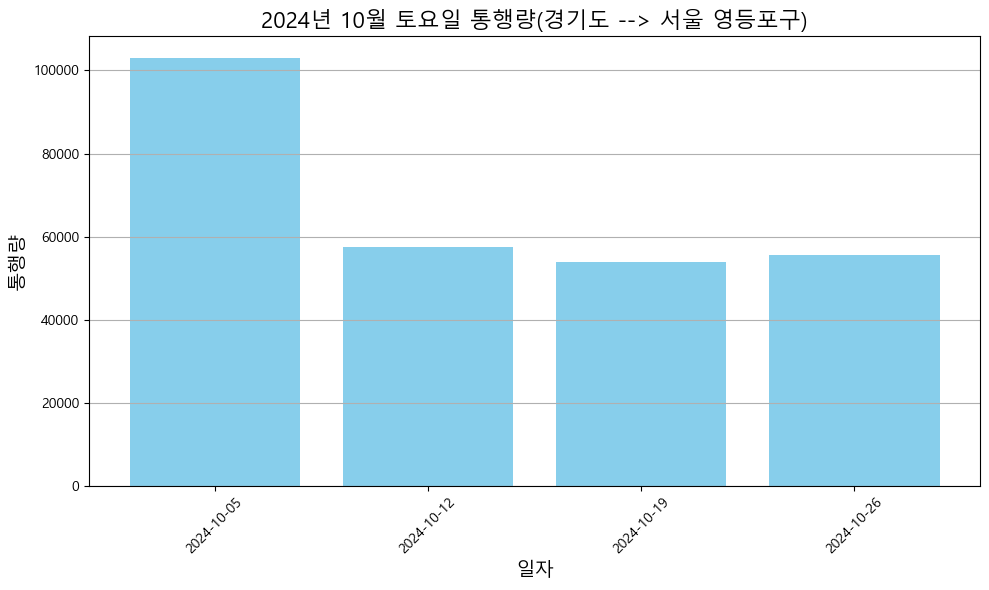

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['일자'], df['통행량'], color='skyblue')
plt.title('2024년 10월 토요일 통행량(경기도 --> 서울 영등포구)', fontsize=16)
plt.xlabel('일자', fontsize=14)
plt.ylabel('통행량', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

2024.09.18. ~ 2024.09.19.

In [4]:
import pandas as pd

In [5]:
File = pd.read_csv('C:/데이터 사이언스/TPSS_행정동_OD_목적.csv')

In [6]:
File

,기준일,시작자치구명,시작행정동명,종료자치구명,종료행정동명,전체승객수
0,20240918,서울시외,서울시외,성북구,정릉3동,2
1,20240918,서울시외,서울시외,성북구,정릉3동,1
2,20240918,서울시외,서울시외,성북구,정릉3동,2
3,20240918,서울시외,서울시외,성북구,정릉3동,2
4,20240918,서울시외,서울시외,성북구,정릉3동,1
...,...,...,...,...,...,...
515456,20240919,서울시외,서울시외,서울시외,서울시외,6
515457,20240919,서울시외,서울시외,서울시외,서울시외,5
515458,20240919,서울시외,서울시외,서울시외,서울시외,3
515459,20240919,서울시외,서울시외,서울시외,서울시외,4


In [24]:
filtered_File = File.iloc[:, [0, 2, 4, 5]]

In [25]:
filtered_File

,기준일,시작행정동명,종료행정동명,전체승객수
0,20240918,서울시외,정릉3동,2
1,20240918,서울시외,정릉3동,1
2,20240918,서울시외,정릉3동,2
3,20240918,서울시외,정릉3동,2
4,20240918,서울시외,정릉3동,1
...,...,...,...,...
515456,20240919,서울시외,서울시외,6
515457,20240919,서울시외,서울시외,5
515458,20240919,서울시외,서울시외,3
515459,20240919,서울시외,서울시외,4


In [26]:
filtered1_File = filtered_File.loc[
    (filtered_File['시작행정동명'] == '서울시외') &
    (filtered_File['종료행정동명'] == '반포4동') &
    (filtered_File['기준일'] == 20240918)
]

In [27]:
filtered1_File

,기준일,시작행정동명,종료행정동명,전체승객수
59905,20240918,서울시외,반포4동,31
59906,20240918,서울시외,반포4동,1
59907,20240918,서울시외,반포4동,3
59908,20240918,서울시외,반포4동,4
59909,20240918,서울시외,반포4동,18
...,...,...,...,...
61048,20240918,서울시외,반포4동,2
61049,20240918,서울시외,반포4동,2
61050,20240918,서울시외,반포4동,1
61051,20240918,서울시외,반포4동,14


In [28]:
total_passengers = filtered1_File['전체승객수'].sum()

In [29]:
total_passengers

10579

In [32]:
filtered2_File = filtered_File.loc[
    (filtered_File['시작행정동명'] == '서울시외') &
    (filtered_File['종료행정동명'] == '반포4동') &
    (filtered_File['기준일'] == 20240919)
]

In [33]:
filtered2_File

,기준일,시작행정동명,종료행정동명,전체승객수
509987,20240919,서울시외,반포4동,9
509988,20240919,서울시외,반포4동,5
510407,20240919,서울시외,반포4동,26
510408,20240919,서울시외,반포4동,13
510409,20240919,서울시외,반포4동,7
...,...,...,...,...
511111,20240919,서울시외,반포4동,3
511112,20240919,서울시외,반포4동,3
511532,20240919,서울시외,반포4동,6
511533,20240919,서울시외,반포4동,2


In [34]:
total_passengers = filtered2_File['전체승객수'].sum()

In [35]:
total_passengers

10708

In [37]:
filtered3_File = filtered_File.loc[
    (filtered_File['시작행정동명'] == '반포4동') &
    (filtered_File['기준일'] == 20240918)
]

In [38]:
filtered3_File

,기준일,시작행정동명,종료행정동명,전체승객수
225113,20240918,반포4동,개포1동,77
225114,20240918,반포4동,개포2동,208
225115,20240918,반포4동,개포3동,17
225116,20240918,반포4동,개포4동,106
225117,20240918,반포4동,논현1동,1100
...,...,...,...,...
228083,20240918,반포4동,상봉2동,630
228084,20240918,반포4동,신내1동,108
228085,20240918,반포4동,신내2동,16
228086,20240918,반포4동,중화1동,9


In [45]:
grouped_sums = filtered3_File.groupby('종료행정동명')['전체승객수'].sum().reset_index()

In [46]:
top_10 = grouped_sums.sort_values(by='전체승객수', ascending=False).head(10)

In [47]:
top_10

,종료행정동명,전체승객수
191,서울시외,16193
279,역삼1동,2259
385,청룡동,2180
178,상도1동,1987
192,서원동,1842
195,서초3동,1760
60,능동,1713
188,서교동,1710
69,대방동,1614
274,양재1동,1425


In [48]:
filtered4_File = filtered_File.loc[
    (filtered_File['시작행정동명'] == '반포4동') &
    (filtered_File['기준일'] == 20240919)
]

In [49]:
filtered4_File

,기준일,시작행정동명,종료행정동명,전체승객수
413802,20240919,반포4동,개포1동,84
413803,20240919,반포4동,개포2동,166
413804,20240919,반포4동,개포3동,13
413805,20240919,반포4동,개포4동,108
413806,20240919,반포4동,논현1동,1488
...,...,...,...,...
416774,20240919,반포4동,상봉2동,365
416775,20240919,반포4동,신내1동,109
416776,20240919,반포4동,신내2동,17
416777,20240919,반포4동,중화1동,8


In [50]:
grouped_sums = filtered4_File.groupby('종료행정동명')['전체승객수'].sum().reset_index()

In [51]:
top_10 = grouped_sums.sort_values(by='전체승객수', ascending=False).head(10)

In [52]:
top_10

,종료행정동명,전체승객수
189,서울시외,13038
277,역삼1동,2468
193,서초3동,2018
191,서초1동,1552
57,논현1동,1488
176,상도1동,1460
272,양재1동,1404
276,여의동,1220
192,서초2동,1220
155,사당2동,1181


In [53]:
filtered5_File = filtered_File.loc[
    (filtered_File['종료행정동명'] == '반포4동') &
    (filtered_File['기준일'] == 20240918)
]

In [54]:
grouped_sums = filtered5_File.groupby('시작행정동명')['전체승객수'].sum().reset_index()

In [55]:
top_10 = grouped_sums.sort_values(by='전체승객수', ascending=False).head(10)

In [56]:
top_10

,시작행정동명,전체승객수
189,서울시외,10579
276,역삼1동,1535
193,서초3동,1385
125,반포4동,914
186,서교동,894
57,논현1동,836
191,서초1동,792
71,대치2동,775
275,여의동,772
176,상도1동,767


In [57]:
filtered6_File = filtered_File.loc[
    (filtered_File['종료행정동명'] == '반포4동') &
    (filtered_File['기준일'] == 20240919)
]

In [58]:
grouped_sums = filtered6_File.groupby('시작행정동명')['전체승객수'].sum().reset_index()

In [59]:
top_10 = grouped_sums.sort_values(by='전체승객수', ascending=False).head(10)

In [60]:
top_10

,시작행정동명,전체승객수
187,서울시외,10708
274,역삼1동,2103
191,서초3동,1971
189,서초1동,1394
57,논현1동,1329
269,양재1동,1258
123,반포4동,1164
273,여의동,1136
267,압구정동,1129
174,상도1동,1062


서울교통빅데이터플랫폼 API 발급 및 확인

In [ ]:
import requests
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# SSL 경고 무시
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# API 정보
BASE_URL = "http://t-data.seoul.go.kr/apig/apiman-gateway/tapi/TaimsTpssEmdOdTc/1.0"
API_KEY = "5a8255ca-b452-4e9d-ac2c-9b43d6521522"

# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기를 5로 감소
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20241005",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            if not data:  # 데이터가 없으면 루프 종료
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + row_count - 1}까지 데이터 가져옴.")
            start_row += row_count  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '여의동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '여의동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '여의동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장
filtered_df.to_csv('filtered_api_response.csv', index=False, encoding='utf-8')
print("\n필터링된 데이터를 'filtered_api_response.csv'에 저장했습니다.")

In [8]:
import requests
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# SSL 경고 무시
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# API 정보
BASE_URL = "http://t-data.seoul.go.kr/apig/apiman-gateway/tapi/TaimsTpssEmdOdTc/1.0"
API_KEY = "8f16e239-315a-4af4-b8da-552eb9cac483"

# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기를 5로 감소
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20240320",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            if not data:  # 데이터가 없으면 루프 종료
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + row_count - 1}까지 데이터 가져옴.")
            start_row += row_count  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '여의동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '고척1동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '고척1동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장
filtered_df.to_csv('filtered_api_response.csv', index=False, encoding='utf-8')
print("\n필터링된 데이터를 'filtered_api_response.csv'에 저장했습니다.")

1부터 5000까지 데이터 가져옴.
5001부터 10000까지 데이터 가져옴.
10001부터 15000까지 데이터 가져옴.
15001부터 20000까지 데이터 가져옴.
20001부터 25000까지 데이터 가져옴.
25001부터 30000까지 데이터 가져옴.
30001부터 35000까지 데이터 가져옴.
35001부터 40000까지 데이터 가져옴.
40001부터 45000까지 데이터 가져옴.
45001부터 50000까지 데이터 가져옴.
50001부터 55000까지 데이터 가져옴.
55001부터 60000까지 데이터 가져옴.
60001부터 65000까지 데이터 가져옴.
65001부터 70000까지 데이터 가져옴.
70001부터 75000까지 데이터 가져옴.
75001부터 80000까지 데이터 가져옴.
80001부터 85000까지 데이터 가져옴.
85001부터 90000까지 데이터 가져옴.
90001부터 95000까지 데이터 가져옴.
95001부터 100000까지 데이터 가져옴.
100001부터 105000까지 데이터 가져옴.
105001부터 110000까지 데이터 가져옴.
110001부터 115000까지 데이터 가져옴.
115001부터 120000까지 데이터 가져옴.
120001부터 125000까지 데이터 가져옴.
125001부터 130000까지 데이터 가져옴.
130001부터 135000까지 데이터 가져옴.
135001부터 140000까지 데이터 가져옴.
140001부터 145000까지 데이터 가져옴.
145001부터 150000까지 데이터 가져옴.
150001부터 155000까지 데이터 가져옴.
155001부터 160000까지 데이터 가져옴.
160001부터 165000까지 데이터 가져옴.
165001부터 170000까지 데이터 가져옴.
170001부터 175000까지 데이터 가져옴.
175001부터 180000까지 데이터 가져옴.
180001부터 185000까지 데이터 가져옴.
185001부터 190000까지 데이터 가져옴.
190001부터 195000까지 데

2024.03.20. D=고척1동

In [10]:
import requests
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# SSL 경고 무시
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# API 정보
BASE_URL = "http://t-data.seoul.go.kr/apig/apiman-gateway/tapi/TaimsTpssEmdOdTc/1.0"
API_KEY = "8f16e239-315a-4af4-b8da-552eb9cac483"

# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기를 5로 감소
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20240320",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            if not data:  # 데이터가 없으면 루프 종료
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + row_count - 1}까지 데이터 가져옴.")
            start_row += row_count  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '고척1동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '고척1동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '고척1동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20240320고척1동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

1부터 5000까지 데이터 가져옴.
5001부터 10000까지 데이터 가져옴.
10001부터 15000까지 데이터 가져옴.
15001부터 20000까지 데이터 가져옴.
20001부터 25000까지 데이터 가져옴.
25001부터 30000까지 데이터 가져옴.
30001부터 35000까지 데이터 가져옴.
35001부터 40000까지 데이터 가져옴.
40001부터 45000까지 데이터 가져옴.
45001부터 50000까지 데이터 가져옴.
50001부터 55000까지 데이터 가져옴.
55001부터 60000까지 데이터 가져옴.
60001부터 65000까지 데이터 가져옴.
65001부터 70000까지 데이터 가져옴.
70001부터 75000까지 데이터 가져옴.
75001부터 80000까지 데이터 가져옴.
80001부터 85000까지 데이터 가져옴.
85001부터 90000까지 데이터 가져옴.
90001부터 95000까지 데이터 가져옴.
95001부터 100000까지 데이터 가져옴.
100001부터 105000까지 데이터 가져옴.
105001부터 110000까지 데이터 가져옴.
110001부터 115000까지 데이터 가져옴.
115001부터 120000까지 데이터 가져옴.
120001부터 125000까지 데이터 가져옴.
125001부터 130000까지 데이터 가져옴.
130001부터 135000까지 데이터 가져옴.
135001부터 140000까지 데이터 가져옴.
140001부터 145000까지 데이터 가져옴.
145001부터 150000까지 데이터 가져옴.
150001부터 155000까지 데이터 가져옴.
155001부터 160000까지 데이터 가져옴.
160001부터 165000까지 데이터 가져옴.
165001부터 170000까지 데이터 가져옴.
170001부터 175000까지 데이터 가져옴.
175001부터 180000까지 데이터 가져옴.
180001부터 185000까지 데이터 가져옴.
185001부터 190000까지 데이터 가져옴.
190001부터 195000까지 데

In [1]:
import pandas as pd

In [2]:
file1 = pd.read_csv('C:/데이터 사이언스/20240320고척1동.csv')

In [3]:
file1

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
0,20240320,성북구,동선동,구로구,고척1동,2
1,20240320,양천구,신정2동,구로구,고척1동,11
2,20240320,영등포구,신길4동,구로구,고척1동,11
3,20240320,영등포구,영등포본동,구로구,고척1동,14
4,20240320,용산구,서빙고동,구로구,고척1동,3
...,...,...,...,...,...,...
504,20240320,강남구,세곡동,구로구,고척1동,1
505,20240320,강남구,압구정동,구로구,고척1동,13
506,20240320,강남구,역삼1동,구로구,고척1동,72
507,20240320,강남구,청담동,구로구,고척1동,3


In [5]:
sorted_file1 = file1.sort_values(by='totPsngNum', ascending=False)

In [ ]:
sorted_file1

In [7]:
top_30_file1 = sorted_file1.head(30)

In [8]:
top_30_file1

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
321,20240320,구로구,고척2동,구로구,고척1동,688
262,20240320,구로구,고척1동,구로구,고척1동,679
338,20240320,구로구,개봉1동,구로구,고척1동,670
219,20240320,구로구,신도림동,구로구,고척1동,473
38,20240320,양천구,신정3동,구로구,고척1동,401
145,20240320,영등포구,영등포동,구로구,고척1동,347
356,20240320,구로구,오류2동,구로구,고척1동,296
404,20240320,구로구,구로2동,구로구,고척1동,291
333,20240320,강서구,화곡1동,구로구,고척1동,277
287,20240320,구로구,오류1동,구로구,고척1동,271


2024.10.05. D=여의동 (데이터 매우 좋음)

In [ ]:
import requests
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# SSL 경고 무시
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# API 정보
BASE_URL = "http://t-data.seoul.go.kr/apig/apiman-gateway/tapi/TaimsTpssEmdOdTc/1.0"
API_KEY = "8f16e239-315a-4af4-b8da-552eb9cac483"

# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기를 5로 감소
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20241005",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            if not data:  # 데이터가 없으면 루프 종료
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + row_count - 1}까지 데이터 가져옴.")
            start_row += row_count  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '고척1동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '여의동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '여의동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20241005여의동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

In [10]:
file2 = pd.read_csv('C:/데이터 사이언스/20241005여의동.csv')

In [11]:
sorted_file2 = file2.sort_values(by='totPsngNum', ascending=False)

In [12]:
top_30_file2 = sorted_file2.head(30)

In [13]:
top_30_file2

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
149,20241005,마포구,서교동,영등포구,여의동,6114
620,20241005,영등포구,여의동,영등포구,여의동,5880
127,20241005,강남구,역삼1동,영등포구,여의동,5153
722,20241005,서초구,반포4동,영등포구,여의동,4570
164,20241005,강서구,화곡1동,영등포구,여의동,4132
103,20241005,동작구,노량진1동,영등포구,여의동,2895
630,20241005,영등포구,영등포본동,영등포구,여의동,2869
696,20241005,용산구,한강로동,영등포구,여의동,2771
655,20241005,종로구,사직동,영등포구,여의동,2693
594,20241005,양천구,목1동,영등포구,여의동,2662


In [15]:
import requests
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# SSL 경고 무시
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# API 정보
BASE_URL = "http://t-data.seoul.go.kr/apig/apiman-gateway/tapi/TaimsTpssEmdOdTc/1.0"
API_KEY = "8f16e239-315a-4af4-b8da-552eb9cac483"

# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기를 5로 감소
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20241005",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            if not data:  # 데이터가 없으면 루프 종료
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + row_count - 1}까지 데이터 가져옴.")
            start_row += row_count  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '고척1동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '잠실2동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '잠실2동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20241005잠실2동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

1부터 5000까지 데이터 가져옴.
5001부터 10000까지 데이터 가져옴.
10001부터 15000까지 데이터 가져옴.
15001부터 20000까지 데이터 가져옴.
20001부터 25000까지 데이터 가져옴.
25001부터 30000까지 데이터 가져옴.
30001부터 35000까지 데이터 가져옴.
35001부터 40000까지 데이터 가져옴.
40001부터 45000까지 데이터 가져옴.
45001부터 50000까지 데이터 가져옴.
50001부터 55000까지 데이터 가져옴.
55001부터 60000까지 데이터 가져옴.
60001부터 65000까지 데이터 가져옴.
65001부터 70000까지 데이터 가져옴.
70001부터 75000까지 데이터 가져옴.
75001부터 80000까지 데이터 가져옴.
80001부터 85000까지 데이터 가져옴.
85001부터 90000까지 데이터 가져옴.
90001부터 95000까지 데이터 가져옴.
95001부터 100000까지 데이터 가져옴.
100001부터 105000까지 데이터 가져옴.
105001부터 110000까지 데이터 가져옴.
110001부터 115000까지 데이터 가져옴.
115001부터 120000까지 데이터 가져옴.
120001부터 125000까지 데이터 가져옴.
125001부터 130000까지 데이터 가져옴.
130001부터 135000까지 데이터 가져옴.
135001부터 140000까지 데이터 가져옴.
140001부터 145000까지 데이터 가져옴.
145001부터 150000까지 데이터 가져옴.
150001부터 155000까지 데이터 가져옴.
155001부터 160000까지 데이터 가져옴.
160001부터 165000까지 데이터 가져옴.
165001부터 170000까지 데이터 가져옴.
170001부터 175000까지 데이터 가져옴.
175001부터 180000까지 데이터 가져옴.
180001부터 185000까지 데이터 가져옴.
185001부터 190000까지 데이터 가져옴.
190001부터 195000까지 데

In [16]:
file3 = pd.read_csv('C:/데이터 사이언스/20241005잠실2동.csv')

In [18]:
sorted_file3 = file3.sort_values(by='totPsngNum', ascending=False)

In [19]:
top_30_file3 = sorted_file3.head(30)

In [20]:
top_30_file3

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
248,20241005,송파구,잠실6동,송파구,잠실2동,2243
360,20241005,서초구,서초2동,송파구,잠실2동,811
113,20241005,강남구,대치2동,송파구,잠실2동,689
35,20241005,광진구,구의3동,송파구,잠실2동,529
242,20241005,송파구,잠실4동,송파구,잠실2동,464
207,20241005,광진구,화양동,송파구,잠실2동,454
116,20241005,강남구,대치4동,송파구,잠실2동,428
166,20241005,관악구,남현동,송파구,잠실2동,378
139,20241005,마포구,서교동,송파구,잠실2동,368
232,20241005,송파구,잠실7동,송파구,잠실2동,313


2024년 10월 토요일 잠실2동 평균 이동(D=잠실2동)

In [26]:
import pandas as pd

file_paths = [
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241005.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241012.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241019.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241026.csv',
]
admi_file_path = 'C:/데이터 사이언스/ADMI_202410.csv'

def filter_rank_and_merge(file_path, admi_file_path):
    try:
        df = pd.read_csv(file_path)

        admi_df = pd.read_csv(admi_file_path)

        filtered_df = df[df['d_admdong_cd'] == 11710670]

        ranked_df = (
            filtered_df['o_admdong_cd']
            .value_counts()
            .reset_index()
        )
        ranked_df.columns = ['o_admdong_cd', 'Count']

        merged_df = pd.merge(ranked_df, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        merged_df = merged_df[['o_admdong_cd', 'ADMI_NM', 'Count']]

        return merged_df

    except Exception as e:
        print(f"Error processing data: {e}")
        return None

def analyze_multiple_files(file_paths, admi_file_path):
    all_counts = []

    for file_path in file_paths:
        result_df = filter_rank_and_merge(file_path, admi_file_path)
        if result_df is not None:
            all_counts.append(result_df[['o_admdong_cd', 'Count']])

    combined_df = pd.concat(all_counts, ignore_index=True)

    avg_counts = (
        combined_df.groupby('o_admdong_cd')['Count']
        .mean()
        .reset_index()
    )
    avg_counts.columns = ['o_admdong_cd', 'Average_Count']

    return avg_counts

In [27]:
def get_top_30_with_names(avg_counts, admi_file_path):
    try:
        admi_df = pd.read_csv(admi_file_path)

        top_30 = avg_counts.sort_values(by='Average_Count', ascending=False).head(30)

        top_30 = pd.merge(top_30, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        top_30 = top_30[['o_admdong_cd', 'ADMI_NM', 'Average_Count']]

        return top_30

    except Exception as e:
        print(f"Error processing top 30 data: {e}")
        return None

average_result = analyze_multiple_files(file_paths, admi_file_path)

top_30_result = get_top_30_with_names(average_result, admi_file_path)

print("상위 30개의 평균 통행 데이터:")
top_30_result

상위 30개의 평균 통행 데이터:


,o_admdong_cd,ADMI_NM,Average_Count
0,11710670,잠실2동,758.50
1,11710650,잠실본동,538.00
2,11710680,잠실3동,514.50
3,11710710,잠실6동,309.50
4,11710720,잠실7동,195.75
5,11680580,삼성1동,191.00
6,11680610,대치2동,179.00
7,11710562,방이2동,161.00
8,11710600,석촌동,151.75
9,11710610,삼전동,146.75


2024.10.26. D=서교동 (데이터 매우 좋음)

In [ ]:
import requests
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# SSL 경고 무시
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# API 정보
BASE_URL = "http://t-data.seoul.go.kr/apig/apiman-gateway/tapi/TaimsTpssEmdOdTc/1.0"
API_KEY = "8f16e239-315a-4af4-b8da-552eb9cac483"

# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기를 5로 감소
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20241026",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            if not data:  # 데이터가 없으면 루프 종료
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + row_count - 1}까지 데이터 가져옴.")
            start_row += row_count  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '고척1동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '서교동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '서교동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20241026서교동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

In [35]:
file4 = pd.read_csv('C:/데이터 사이언스/20241026서교동.csv')

In [36]:
sorted_file4 = file4.sort_values(by='totPsngNum', ascending=False)

In [37]:
top_30_file4 = sorted_file4.head(30)

In [38]:
top_30_file4

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
213,20241026,서울시외,서울시외,마포구,서교동,32712
96,20241026,마포구,서교동,마포구,서교동,8577
58,20241026,중구,명동,마포구,서교동,5979
15,20241026,마포구,대흥동,마포구,서교동,5255
201,20241026,서대문구,신촌동,마포구,서교동,4609
165,20241026,마포구,성산2동,마포구,서교동,4391
290,20241026,중구,회현동,마포구,서교동,3297
276,20241026,중구,을지로동,마포구,서교동,2955
109,20241026,종로구,"종로1,2,3,4가동",마포구,서교동,2884
292,20241026,영등포구,여의동,마포구,서교동,2665


2024년 10월 토요일 서교동 평균 이동(D=서교동)

In [39]:
import pandas as pd

file_paths = [
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241005.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241012.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241019.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241026.csv',
]
admi_file_path = 'C:/데이터 사이언스/ADMI_202410.csv'

def filter_rank_and_merge(file_path, admi_file_path):
    try:
        df = pd.read_csv(file_path)

        admi_df = pd.read_csv(admi_file_path)

        filtered_df = df[df['d_admdong_cd'] == 11440660]

        ranked_df = (
            filtered_df['o_admdong_cd']
            .value_counts()
            .reset_index()
        )
        ranked_df.columns = ['o_admdong_cd', 'Count']

        merged_df = pd.merge(ranked_df, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        merged_df = merged_df[['o_admdong_cd', 'ADMI_NM', 'Count']]

        return merged_df

    except Exception as e:
        print(f"Error processing data: {e}")
        return None

def analyze_multiple_files(file_paths, admi_file_path):
    all_counts = []

    for file_path in file_paths:
        result_df = filter_rank_and_merge(file_path, admi_file_path)
        if result_df is not None:
            all_counts.append(result_df[['o_admdong_cd', 'Count']])

    combined_df = pd.concat(all_counts, ignore_index=True)

    avg_counts = (
        combined_df.groupby('o_admdong_cd')['Count']
        .mean()
        .reset_index()
    )
    avg_counts.columns = ['o_admdong_cd', 'Average_Count']

    return avg_counts

In [40]:
def get_top_30_with_names(avg_counts, admi_file_path):
    try:
        admi_df = pd.read_csv(admi_file_path)

        top_30 = avg_counts.sort_values(by='Average_Count', ascending=False).head(30)

        top_30 = pd.merge(top_30, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        top_30 = top_30[['o_admdong_cd', 'ADMI_NM', 'Average_Count']]

        return top_30

    except Exception as e:
        print(f"Error processing top 30 data: {e}")
        return None

average_result = analyze_multiple_files(file_paths, admi_file_path)

top_30_result = get_top_30_with_names(average_result, admi_file_path)

print("상위 30개의 평균 통행 데이터:")
top_30_result

상위 30개의 평균 통행 데이터:


,o_admdong_cd,ADMI_NM,Average_Count
0,11440660,서교동,1578.50
1,11410585,신촌동,1129.00
2,11440655,서강동,859.75
3,11440710,연남동,710.25
4,11440680,합정동,653.00
5,11410615,연희동,629.25
6,11440600,대흥동,599.50
7,11440690,망원1동,578.00
8,11440720,성산1동,488.75
9,11560540,여의동,439.50


2024.09.14. D=회현동

In [ ]:
# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20240914",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            # 데이터가 없거나 데이터 크기가 row_count보다 작으면 종료
            if not data or len(data) < row_count:
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + len(data) - 1}까지 데이터 가져옴.")
            start_row += len(data)  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

    # 종료 조건을 만족하면 루프 탈출
    if not data or len(data) < row_count:
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '남영동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '회현동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '회현동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20240914회현동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

In [53]:
file5 = pd.read_csv('C:/데이터 사이언스/20240914회현동.csv')

In [54]:
sorted_file5 = file5.sort_values(by='totPsngNum', ascending=False)

In [55]:
top_30_file5 = sorted_file5.head(30)

In [56]:
top_30_file5

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
674,20240914,중구,명동,중구,회현동,3261
268,20240914,용산구,한강로동,중구,회현동,2996
609,20240914,중구,회현동,중구,회현동,2907
672,20240914,종로구,"종로1,2,3,4가동",중구,회현동,2416
165,20240914,마포구,서교동,중구,회현동,2219
678,20240914,종로구,"종로5,6가동",중구,회현동,1709
601,20240914,중구,필동,중구,회현동,1247
686,20240914,성북구,삼선동,중구,회현동,1224
216,20240914,동대문구,용신동,중구,회현동,1163
188,20240914,관악구,남현동,중구,회현동,1151


2024.09.14. D=반포4동

In [60]:
# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20240914",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            # 데이터가 없거나 데이터 크기가 row_count보다 작으면 종료
            if not data or len(data) < row_count:
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + len(data) - 1}까지 데이터 가져옴.")
            start_row += len(data)  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

    # 종료 조건을 만족하면 루프 탈출
    if not data or len(data) < row_count:
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '남영동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '반포4동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '반포4동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20240914반포4동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

1부터 5000까지 데이터 가져옴.
5001부터 10000까지 데이터 가져옴.
10001부터 15000까지 데이터 가져옴.
15001부터 20000까지 데이터 가져옴.
20001부터 25000까지 데이터 가져옴.
25001부터 30000까지 데이터 가져옴.
30001부터 35000까지 데이터 가져옴.
35001부터 40000까지 데이터 가져옴.
40001부터 45000까지 데이터 가져옴.
45001부터 50000까지 데이터 가져옴.
50001부터 55000까지 데이터 가져옴.
55001부터 60000까지 데이터 가져옴.
60001부터 65000까지 데이터 가져옴.
65001부터 70000까지 데이터 가져옴.
70001부터 75000까지 데이터 가져옴.
75001부터 80000까지 데이터 가져옴.
80001부터 85000까지 데이터 가져옴.
85001부터 90000까지 데이터 가져옴.
90001부터 95000까지 데이터 가져옴.
95001부터 100000까지 데이터 가져옴.
100001부터 105000까지 데이터 가져옴.
105001부터 110000까지 데이터 가져옴.
110001부터 115000까지 데이터 가져옴.
115001부터 120000까지 데이터 가져옴.
120001부터 125000까지 데이터 가져옴.
125001부터 130000까지 데이터 가져옴.
130001부터 135000까지 데이터 가져옴.
135001부터 140000까지 데이터 가져옴.
140001부터 145000까지 데이터 가져옴.
145001부터 150000까지 데이터 가져옴.
150001부터 155000까지 데이터 가져옴.
155001부터 160000까지 데이터 가져옴.
160001부터 165000까지 데이터 가져옴.
165001부터 170000까지 데이터 가져옴.
170001부터 175000까지 데이터 가져옴.
175001부터 180000까지 데이터 가져옴.
180001부터 185000까지 데이터 가져옴.
185001부터 190000까지 데이터 가져옴.
190001부터 195000까지 데

In [61]:
file6 = pd.read_csv('C:/데이터 사이언스/20240914반포4동.csv')

In [63]:
sorted_file6 = file6.sort_values(by='totPsngNum', ascending=False)

In [ ]:
top_30_file6 = sorted_file6.head(30)

In [65]:
top_30_file6

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
121,20240914,강남구,역삼1동,서초구,반포4동,3110
633,20240914,서초구,서초3동,서초구,반포4동,2210
464,20240914,마포구,서교동,서초구,반포4동,2028
130,20240914,강남구,논현1동,서초구,반포4동,1879
129,20240914,강남구,압구정동,서초구,반포4동,1631
441,20240914,관악구,청룡동,서초구,반포4동,1609
50,20240914,동작구,상도1동,서초구,반포4동,1561
492,20240914,관악구,서원동,서초구,반포4동,1421
625,20240914,서초구,양재1동,서초구,반포4동,1353
622,20240914,서초구,서초1동,서초구,반포4동,1353


2024.05.25.(임영웅 콘서트) D=성산2동 (데이터 매우 좋음)

In [ ]:
# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20240525",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            # 데이터가 없거나 데이터 크기가 row_count보다 작으면 종료
            if not data or len(data) < row_count:
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + len(data) - 1}까지 데이터 가져옴.")
            start_row += len(data)  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

    # 종료 조건을 만족하면 루프 탈출
    if not data or len(data) < row_count:
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '남영동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '성산2동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '성산2동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20240525성산2동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

In [73]:
file7 = pd.read_csv('C:/데이터 사이언스/20240525성산2동.csv')

In [74]:
sorted_file7 = file7.sort_values(by='totPsngNum', ascending=False)

In [75]:
top_30_file7 = sorted_file7.head(30)

In [76]:
top_30_file7

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
307,20240525,마포구,서교동,마포구,성산2동,6304
285,20240525,중구,회현동,마포구,성산2동,2876
450,20240525,마포구,상암동,마포구,성산2동,2623
480,20240525,마포구,성산2동,마포구,성산2동,2514
278,20240525,용산구,한강로동,마포구,성산2동,1501
358,20240525,마포구,공덕동,마포구,성산2동,1155
529,20240525,서초구,반포4동,마포구,성산2동,1152
381,20240525,마포구,서강동,마포구,성산2동,1057
206,20240525,은평구,신사1동,마포구,성산2동,1046
484,20240525,서대문구,신촌동,마포구,성산2동,833


2024.08.03.(토트넘 vs 뮌헨 친선경기) D=성산2동 (데이터 매우 좋음)

In [ ]:
# 전체 데이터를 가져오기 위한 설정
start_row = 1
row_count = 5000  # 한 번에 가져올 데이터 크기
all_data = []  # 전체 데이터를 저장할 리스트
MAX_RETRIES = 3  # 재시도 최대 횟수

while True:
    params = {
        "apikey": API_KEY,
        "stdrDe": "20240803",  # 기준 날짜
        "startRow": start_row,  # 시작 행 번호
        "rowCnt": row_count     # 한 번에 가져올 데이터 크기
    }

    for retry in range(MAX_RETRIES):  # 재시도 로직 추가
        try:
            response = requests.get(BASE_URL, params=params, verify=False)
            response.raise_for_status()
            data = response.json()

            # 데이터가 없거나 데이터 크기가 row_count보다 작으면 종료
            if not data or len(data) < row_count:
                print("더 이상 가져올 데이터가 없습니다.")
                break

            all_data.extend(data)  # 데이터를 누적 저장
            print(f"{start_row}부터 {start_row + len(data) - 1}까지 데이터 가져옴.")
            start_row += len(data)  # 다음 페이지로 이동

            time.sleep(0.5)  # 요청 간 0.5초 딜레이
            break  # 성공적으로 데이터를 가져왔으므로 재시도 루프 종료

        except requests.exceptions.SSLError as e:
            print(f"SSL 오류 발생. 재시도 중... (시도 {retry + 1}/{MAX_RETRIES}): {e}")
            time.sleep(2)  # SSL 오류 시 2초 대기 후 재시도
        except requests.exceptions.RequestException as e:
            print(f"요청 중 오류 발생: {e}")
            time.sleep(2)
    else:
        print("최대 재시도 횟수를 초과했습니다. 연결이 불안정합니다.")
        break

    # 종료 조건을 만족하면 루프 탈출
    if not data or len(data) < row_count:
        break

# DataFrame으로 변환
df = pd.DataFrame(all_data)

# 'endEmdNm' 값이 '남영동'인 데이터 필터링
filtered_df = df[df['endEmdNm'] == '성산2동']

# 필터링된 데이터 출력
if not filtered_df.empty:
    print("필터링된 데이터 ('endEmdNm' == '성산2동'):")
    print(filtered_df)
else:
    print("조건에 맞는 데이터가 없습니다.")

# 필요 시 CSV로 저장 (utf-8-sig 인코딩 사용)
output_file = '20240803성산2동.csv'
filtered_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n필터링된 데이터를 '{output_file}'에 저장했습니다 (utf-8-sig 인코딩).")

In [77]:
file8 = pd.read_csv('C:/데이터 사이언스/20240803성산2동.csv')

In [78]:
sorted_file8 = file8.sort_values(by='totPsngNum', ascending=False)

In [79]:
top_30_file8 = sorted_file8.head(30)

In [80]:
top_30_file8

,stdrDe,startSggNm,startEmdNm,endSggNm,endEmdNm,totPsngNum
116,20240803,마포구,서교동,마포구,성산2동,8240
322,20240803,마포구,상암동,마포구,성산2동,3143
299,20240803,마포구,성산2동,마포구,성산2동,2945
530,20240803,중구,회현동,마포구,성산2동,2031
579,20240803,용산구,한강로동,마포구,성산2동,1608
11,20240803,마포구,서강동,마포구,성산2동,1424
390,20240803,마포구,공덕동,마포구,성산2동,1373
545,20240803,영등포구,여의동,마포구,성산2동,1091
62,20240803,마포구,대흥동,마포구,성산2동,1087
64,20240803,서초구,반포4동,마포구,성산2동,811


Dash

In [ ]:
# 1. 인코딩 설정
# coding: utf-8

# 2. 라이브러리 호출
from dash import Dash, html, dcc, Input, Output
import plotly.graph_objects as go

# 3. app 정의
app = Dash()

# 4. server 정의
server = app.server

# 5. Layout 정의
app.layout = html.Div([
    dcc.Input(
        id='id_input', 
        type='text', 
        placeholder='검색'
    ),
    dcc.Graph(
        id='id_output'
    )
])

# 6. Callback 정의
@app.callback(
    Output(component_id='id_output', component_property='figure'),
    Input(component_id='id_input', component_property='value')
)
def update_output(value_input):
    # 입력 값에 따라 그래프 생성
    if value_input:
        value_output = go.Figure(data=go.Bar(x=['A', 'B', 'C'], y=[1, 2, 3]))
        value_output.update_layout(title=f"입력 값: {value_input}")
    else:
        value_output = go.Figure(data=go.Bar(x=['A', 'B', 'C'], y=[0, 0, 0]))
        value_output.update_layout(title="통행량")
    return value_output

# 7. server로 launch
if __name__ == '__main__':
    app.run_server(debug=False)


2024.10.05. D=여의동 시각화

In [7]:
df1 = pd.DataFrame({'2024.10.05. 여의동 도착 통행량': [6114, 5153, 4570, 4132, 2895, 2869, 2771, 2693, 2662, 2640],
                   '2024년 10월 토요일 여의동 평균 도착 통행량': [428.5, 243.5, 212.75, 168.75, 295, 258, 371.75, 159.25, 191.5, 336]},
                   index = ['서교동', '역삼1동', '반포4동', '화곡1동', '노량진1동', '영등포본동', '한강로동', '사직동', '목1동', '당산2동'])

<Axes: title={'center': '서울불꽃축제 기간 통행량 비교?'}, xlabel='출발 행정동', ylabel='통행량'>

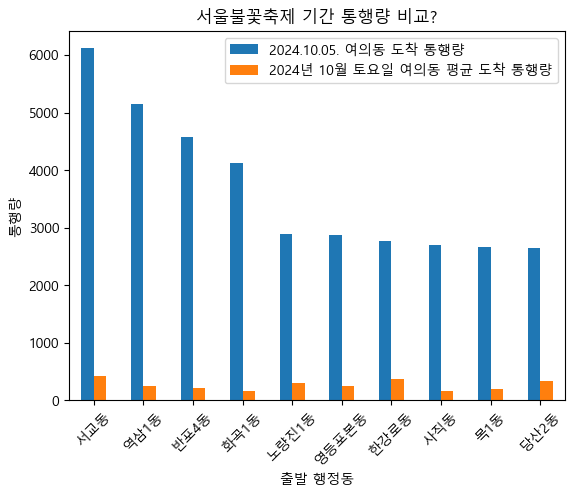

In [12]:
df1.plot.bar(rot=45, xlabel="출발 행정동", ylabel="통행량", title="서울불꽃축제 기간 통행량 비교?")

2024년 10월 토요일 평균 화곡1동 - 여의동 평균 통행량

In [2]:
import pandas as pd

file_paths = [
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241005.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241012.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241019.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241026.csv',
]
admi_file_path = 'C:/데이터 사이언스/ADMI_202410.csv'

def filter_rank_and_merge(file_path, admi_file_path, d_admdong_cd, o_admdong_cd):
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path)
        admi_df = pd.read_csv(admi_file_path)

        # d_admdong_cd 기준으로 필터링
        filtered_df = df[df['d_admdong_cd'] == 11560540]

        # o_admdong_cd 추가 필터링 (고정된 값)
        filtered_df = filtered_df[filtered_df['o_admdong_cd'] == 11500540]

        # value_counts로 o_admdong_cd 집계
        ranked_df = (
            filtered_df['o_admdong_cd']
            .value_counts()
            .reset_index()
        )
        ranked_df.columns = ['o_admdong_cd', 'Count']

        # ADMI 데이터와 병합
        merged_df = pd.merge(ranked_df, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        # 필요한 컬럼만 선택
        merged_df = merged_df[['o_admdong_cd', 'ADMI_NM', 'Count']]

        return merged_df

    except Exception as e:
        print(f"Error processing data: {e}")
        return None

def analyze_multiple_files(file_paths, admi_file_path, d_admdong_cd, o_admdong_cd):
    all_counts = []

    for file_path in file_paths:
        # 고정된 o_admdong_cd를 사용
        result_df = filter_rank_and_merge(file_path, admi_file_path, d_admdong_cd, o_admdong_cd)
        if result_df is not None:
            all_counts.append(result_df[['o_admdong_cd', 'Count']])

    # 데이터 합치기
    combined_df = pd.concat(all_counts, ignore_index=True)

    # 평균 계산
    avg_counts = (
        combined_df.groupby('o_admdong_cd')['Count']
        .mean()
        .reset_index()
    )
    avg_counts.columns = ['o_admdong_cd', 'Average_Count']

    return avg_counts


In [3]:
d_admdong_cd = 11560540  # 필터링 대상 d_admdong_cd
o_admdong_cd = 11500540  # 필터링 대상 o_admdong_cd

# 분석 실행
result = analyze_multiple_files(file_paths, admi_file_path, d_admdong_cd, o_admdong_cd)

# 결과 출력
print(f"d_admdong_cd={d_admdong_cd}, o_admdong_cd={o_admdong_cd}에 대한 평균 집계 결과:")
print(result)

d_admdong_cd=11560540, o_admdong_cd=11500540에 대한 평균 집계 결과:
   o_admdong_cd  Average_Count
0      11500540         168.75


2024년 10월 토요일 평균 사직동 - 여의동 평균 통행량

In [4]:
import pandas as pd

file_paths = [
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241005.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241012.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241019.csv',
    'C:/데이터 사이언스/seoul_purpose_admdong3_final_20241026.csv',
]
admi_file_path = 'C:/데이터 사이언스/ADMI_202410.csv'

def filter_rank_and_merge(file_path, admi_file_path, d_admdong_cd, o_admdong_cd):
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path)
        admi_df = pd.read_csv(admi_file_path)

        # d_admdong_cd 기준으로 필터링
        filtered_df = df[df['d_admdong_cd'] == 11560540]

        # o_admdong_cd 추가 필터링 (고정된 값)
        filtered_df = filtered_df[filtered_df['o_admdong_cd'] == 11110530]

        # value_counts로 o_admdong_cd 집계
        ranked_df = (
            filtered_df['o_admdong_cd']
            .value_counts()
            .reset_index()
        )
        ranked_df.columns = ['o_admdong_cd', 'Count']

        # ADMI 데이터와 병합
        merged_df = pd.merge(ranked_df, admi_df, left_on='o_admdong_cd', right_on='ADMI_CD', how='left')

        # 필요한 컬럼만 선택
        merged_df = merged_df[['o_admdong_cd', 'ADMI_NM', 'Count']]

        return merged_df

    except Exception as e:
        print(f"Error processing data: {e}")
        return None

def analyze_multiple_files(file_paths, admi_file_path, d_admdong_cd, o_admdong_cd):
    all_counts = []

    for file_path in file_paths:
        # 고정된 o_admdong_cd를 사용
        result_df = filter_rank_and_merge(file_path, admi_file_path, d_admdong_cd, o_admdong_cd)
        if result_df is not None:
            all_counts.append(result_df[['o_admdong_cd', 'Count']])

    # 데이터 합치기
    combined_df = pd.concat(all_counts, ignore_index=True)

    # 평균 계산
    avg_counts = (
        combined_df.groupby('o_admdong_cd')['Count']
        .mean()
        .reset_index()
    )
    avg_counts.columns = ['o_admdong_cd', 'Average_Count']

    return avg_counts


In [5]:
d_admdong_cd = 11560540  # 필터링 대상 d_admdong_cd
o_admdong_cd = 11110530  # 필터링 대상 o_admdong_cd

# 분석 실행
result = analyze_multiple_files(file_paths, admi_file_path, d_admdong_cd, o_admdong_cd)

# 결과 출력
print(f"d_admdong_cd={d_admdong_cd}, o_admdong_cd={o_admdong_cd}에 대한 평균 집계 결과:")
print(result)

d_admdong_cd=11560540, o_admdong_cd=11110530에 대한 평균 집계 결과:
   o_admdong_cd  Average_Count
0      11110530         159.25
